In [1]:
# 라이브러리 로드
!pip install graphviz
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer # 사용할 dataset (유방암데이터)
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
from sklearn.tree import export_graphviz # tree 시각화를 위해
# export_graphviz : 의사결정나무에 대한 graphviz dot data 생성하는 함수
import graphviz # tree 시각화
import sklearn.metrics as mt # 성능지표를 계산하기 위해 import
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증

import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv('data_file_csv.csv')


#변수 endlat과 endlon을 합치는 작업

te_list = all_data['endlat'].tolist()

for i in range (len(te_list)):
    all_data.loc[i,'endplus'] = ['1']

for i in range (len(te_list)):
    a = all_data.loc[i,'endlat']
    b = all_data.loc[i,'endlon']
    a = a * 10
    b = b * 10
    a = a % 100
    b = b % 100
    a = int(a)
    b = int(b)
    new = a*100 + b
    new =  str(new)
    all_data.loc[i,'endplus'] = [new]
    
#endplus 추가한 csv파일 따로 저장
all_data.to_csv("data_file_csv3.csv")

In [3]:
#이 데이터를 활용하기전에, 문자열 데이터를 숫자 데이터로 변환해줄 필요가 있다.

#딕셔너리에 키 값을 대입해 벨류값을 얻어오는 함수
def get_value(k,dic):
    for key, value in dic.items():
         if k == key:
             return value
        
#string, float등 의사결정나무에서는 사용하기 힘든 변수를 사용할 수 있게끔 만들어주는 함수
def get_index(name):
    temp_list = all_data[name].tolist()
    temp_set = set(temp_list)
    temp_list2 = list(temp_set)
    dic= {string:i for i,string in enumerate(temp_list2)}
    
    for i in range(len(temp_list)):
        temp = all_data.loc[i,name]
        temp_value = get_value(temp,dic)
        all_data.loc[i,name] = temp_value
        

#여기서부터 srartpos1에 있는 string 값들을 전부 숫자로 바꿔주는 작업


get_index('startpos1')
    

#여기서부터 startpos2에 있는 string 값들을 전부 숫자로 바꿔주는 작업

get_index('startpos2')
    

#여기서부터 endpos2에 있는 string 값들을 전부 숫자로 바꿔주는 작업

get_index('endpos2')


all_data.drop(columns=["Unnamed: 0"],inplace=True)
all_data['startpos1'] = pd.to_numeric(all_data['startpos1'])
all_data['startpos2'] = pd.to_numeric(all_data['startpos2'])
# list로 만들기
list_whycall=all_data['whycall'].to_list()
list_gotoschool=all_data['gotoschool'].to_list()
list_gotocharge=all_data['gotocharge'].to_list()
# end_destination에 연산결과 추가하기
all_data['end_destination'] = 0
for i in range(len(list_whycall)):
    if (list_whycall[i] *100+ 
                           list_gotoschool[i]*10+
                           list_gotocharge[i] == 100) :
        all_data.iloc[i, 21] = 3
    elif (list_whycall[i] *100+ 
                           list_gotoschool[i]*10+
                           list_gotocharge[i] == 10) :
        all_data.iloc[i, 21] = 2
    elif (list_whycall[i] *100+ 
                           list_gotoschool[i]*10+
                           list_gotocharge[i] == 10) :
        all_data.iloc[i, 21] = 1
    else :
        all_data.iloc[i, 21] = 0
#변수 endlat과 endlon을 합치는 작업
te_list = all_data['startlat'].tolist()
for i in range (len(te_list)):
    all_data.loc[i,'startplus'] = ['1']

for i in range (len(te_list)):
    a = all_data.loc[i,'startlat']
    b = all_data.loc[i,'startlon']
    
    a = a * 10
    b = b * 10
    a = a % 100
    b = b % 100
    a = int(a)
    b = int(b)
    new = a*100 + b
    all_data.loc[i,'startplus'] = [new]


all_data.head()

,no,cartype,receipttime,settime,ridetime,startpos1,startpos2,endpos1,endpos2,receipt,...,startlat,startlon,endlat,endlon,whycall,gotoschool,gotocharge,endplus,end_destination,startplus
0,8075,중형 승합,2022-05-07 오전 12:08:21,2022-05-07 오전 12:15:19,2022-05-07 오전 12:30:26,19,216,동작구,139,2022/05/07 0:08,...,37.53,126.90,37.49,126.90,0,0,0,7469,0,7569
1,8231,중형승합,2022-05-07 오전 12:08:51,2022-05-07 오전 12:17:25,2022-05-07 오전 12:46:23,12,174,관악구,152,2022/05/07 0:08,...,37.50,126.88,37.47,126.97,0,0,0,7469,0,7568
2,8279,중형 승합,2022-05-07 오전 12:09:00,2022-05-07 오전 12:26:57,2022-05-07 오전 12:54:43,4,206,노원구,168,2022/05/07 0:09,...,37.67,127.08,37.64,127.07,0,0,0,7670,0,7670
3,1560,중형 승합,2022-05-07 오전 12:13:00,2022-05-07 오전 12:14:01,2022-05-07 오전 12:14:25,2,260,강동구,17,2022/05/07 0:13,...,37.59,127.08,37.54,127.13,0,0,0,7571,0,7570
4,7913,중형승합,2022-05-07 오전 12:18:00,2022-05-07 오전 1:15:54,2022-05-07 오전 1:33:16,2,214,동대문구,199,2022/05/07 0:18,...,37.61,127.09,37.57,127.06,0,0,0,7570,0,7670


In [4]:
#이 데이터를 활용하기전에, 문자열 데이터를 숫자 데이터로 변환해줄 필요가 있다.

#train과 test 데이터셋을 나눠준다. (endpos1을 우선으로)
#x데이터셋은 startpos1,startpos2로 우선 코딩해준다. x데이터셋쪽이 feature

seed = 42

x_train, x_test, y_train, y_test = train_test_split(all_data[['end_destination', 'startplus',
                        'receipt-ride','hour',
                         'startpos1', 'startpos2']],\
                                                    all_data['endplus'],test_size=0.1, random_state=seed)

#0.3 부분으로 train, 0.7부분으로 test 해준다.

x_train.head()

,end_destination,startplus,receipt-ride,hour,startpos1,startpos2
1319,0,7671,21,8,2,264
1906,0,7569,36,7,16,334
483,0,7571,49,7,10,154
1629,0,7569,20,3,16,17
120,0,7569,9,7,23,102


In [5]:
#여기서부터 의사결정나무를 그리는 코드
    
classifier = DecisionTreeClassifier(random_state=10)
classifier = classifier.fit(x_train,y_train) #학습

dot_data = export_graphviz(classifier,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               #feature_names = all_data.feature_names,  # feature 이름
                               #class_names = all_data.target_names,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)

graph
#여기서부터 의사결정나무 가지치기 코드


In [6]:
y_pred = classifier.predict(x_test) 
# 학습결과 평가
print("Train_Accuracy : ", classifier.score(x_train, y_train), '\n')
print("Test_Accuracy : ", classifier.score(x_test, y_test), '\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred, average = 'micro')
precision = mt.precision_score(y_test, y_pred, average = 'micro')
f1_score = mt.f1_score(y_test, y_pred, average = 'micro')
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy :  0.9785407725321889 

Test_Accuracy :  0.6153846153846154 

Accuracy:  0.62 

Recall:  0.62 

Precision:  0.62 

F1_score:  0.62 

Confusion Matrix: 
 [[ 2  2  0  0  0  1  1  0  0  1  0]
 [ 0  7  1  0  2  1  0  0  0  1  0]
 [ 0  0  5  1  0  0  0  0  0  0  0]
 [ 0  0  1  3  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  4  2  0  0  1  2]
 [ 2  3  0  0  4 32  4  2  0  2  0]
 [ 0  0  1  1  4  5 15  6  0  2  1]
 [ 0  0  1  1  0  0  2  8  0  2  0]
 [ 0  0  0  0  0  1  1  0 10  0  0]
 [ 0  0  0  1  2  4  3  1  1 26  1]
 [ 0  0  0  1  0  0  0  0  0  0  0]]


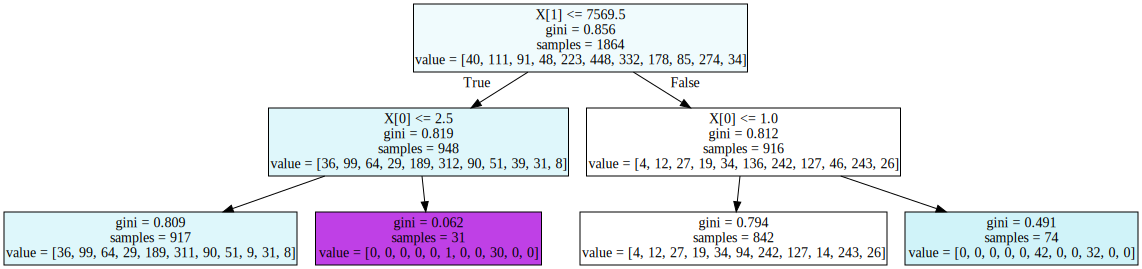

In [7]:
#가지치기가 적용된 의사결정나무 시각화

pruned_dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156) # max_depth=3으로 제한
pruned_dt_clf .fit(x_train, y_train)
export_graphviz(pruned_dt_clf, out_file="prunedtree.dot", impurity=True, filled=True)
with open("prunedtree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

